# Optimització - Descens del gradient

L’optimització matemàtica o la programació matemàtica és la selecció d’un millor element a partir d’un conjunt d’alternatives disponibles. Problemes d’optimització sorgeixen en totes les disciplines quantitatives, des de la informàtica i l’enginyeria fins a la investigació d’operacions i l’economia, i el desenvolupament de mètodes de solució d'aquests problemes ha estat d’interès en les matemàtiques durant segles.

En el cas més senzill, un problema d’optimització consisteix a maximitzar o minimitzar una funció real mitjançant l’elecció sistemàtica dels valors d’entrada dins d’un conjunt permès i el càlcul del valor de la funció. La generalització de la teoria i tècniques d’optimització a altres formulacions constitueix una àmplia àrea de les matemàtiques aplicades. 

Més generalment, l’optimització inclou trobar "els millors valors disponibles" d'alguna funció objectiu donat un domini (o entrada) definits, incloent una varietat de diferents tipus de funcions objectiu i diferents tipus de dominis.

Es pot representar un problema d'optimització de la següent manera:

- Tenint en compte: una funció $f : A \to \mathbb{R}$ des d'algun conjunt $A$ als nombres reals.
- Busquem: un element ${x}_0 \in A$ tal que $f({x}_{0}) \leq f({x})$ per a tots els ${x} \in A$ ("minimització") o tal que $f({x}_{0}) \geq f({x})$  per a tots els ${x} \in A$ ("maximització").

La metodologia crítica per resoldre problemes d'optimització és el **descens del gradient**.

**Prior:**
S'anomena *derivada parcial* d'una funció de diverses variables a la seva derivada respecte a una d'aquestes variables, deixant les altres constants. Cada derivada indica com varia $f$ quan fem un petit canvi en la variable corresponent. 

El *gradient* de la funció $f(x_1, \cdots, x_n)$ és un vector format per les derivades parcials de la funció. 
Aquest dóna la direcció en la qual la funció creix més ràpidament. 

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

### 1. Cas Unidimensionals

Suposem que volem calcular el mimim numèric de la següent funció unidimensional:

$$ f_1(x) = x^2 $$

La derivada parcial de la funcio $f$ és:

$$ \frac{\partial f_1}{\partial x} = 2 x$$

El primer pas que farem és visualitzar la funció i veure el comportament del gradient / derivada sobre un conjunt de punts que pertanyen el domini de la funció.

In [1]:
from plot_utils import *

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

(-10.0, 10.0)

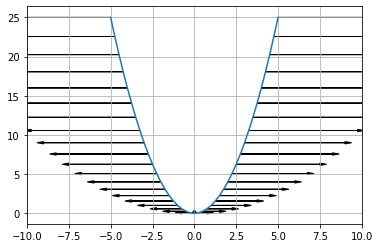

In [2]:
def f1(x):
    return x**2

def df1(x):
    return 2*x

# Function to plot
X = np.arange(-5, 5.01, 0.25)
fig = plt.figure()
plot_1d(X, f1(X), fig)
plot_gradient (X, f1(X), df1(X), fig=fig)
fig.gca().set_xlim(-10, 10)

Per tant, una possible estratègia per minimitzar la funció és repetir la següent estratègia:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient.
3. Fer un petit pas en la direcció contraria del vector gradient: $x^{k+1} = x^{k}-\alpha^{k} \nabla f(x^{k})$
4. Repetir des de 2

La cerca s'acabaria quan el vector gradient és zero, que vol dir que hem trobat un mínim. Donat que la precisió flotant potser evita que arribem mai a aquest nombre, afegim dos mètodes més per acabar la cerca:

1. Si el moviment que realitzem és més petit que un epsilon (*tolerància*): $|x^{k+1} - x^{k}| < eps$.
2. Si realitzem més de `max_iters` iteracions

Si la funció és **unimodal** (conté un únic mínim), hem trobat la nostra solució. 
Sinó, pot ser que estem en un mínim local i que sigui una solució no satisfactòria.

**Implementa la funció *gradient_descent_1d* seguint el procediment proposat. Durant el procés d'optimització visualitza els punts de la gràfica per on vagis passant.**

Recordeu que els ordinadors generen un error numèric, per tant no heu d'igualar mai a zero, heu de fer servir una tolerància.
Definiu també un nombre màxim d'iteracions que l'algorisme pot realitzar per arribar al punt desitjat.

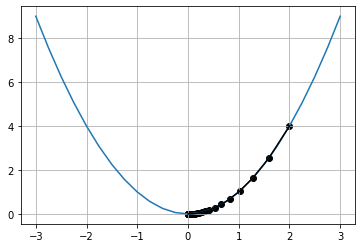

In [3]:
# Implementar per l'alumne

def gradient_descent_1d(grad, x, alpha, eps=1e-3, max_iters=1e2):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient, és a dir,
    donat un punt inicial, el gradient i el pas, intenta trobar el mínim
    de la funció seguint el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_epochs: Iteracions màximes a realitzar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * El mínim trobat.
    """
    
    x_next = x - grad(x)*alpha
    array = np.array([x, x_next])
    
    i = 1
    while(np.abs(x_next - x) > eps and i < max_iters):
        
        x = x_next
        x_next = x - grad(x)*alpha
        
        array = np.append(array, x_next)
        
        i += 1
     
    return (array, x_next)

X = np.arange(-3, 3.01, 0.25)
points, minimum = gradient_descent_1d(df1, 2, .1)

fig = plt.figure()
plot_gradient_descent_1d(f1, X, points, minimum, fig)

Però... són totes els funcions unimodals? Obviament no.

Podem tenir funcions que contenen un màxim i un mínim. Per veure com es comporten aquestes funcions **repeteix el procediment anterior amb aquesta nova funció**.

$$f_2(x) = x^3 - 2x + 2$$

$$ \frac{\partial f_2}{\partial x} = 3x^2 -2 x$$

In [4]:
def f2 ( x ):
    return x**3 - 2*x + 2

def df2(x):
    return 3*x**2 - 2

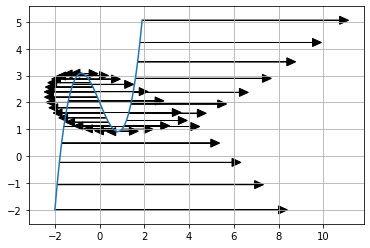

In [5]:
X = np.arange(-2, 2, 0.1)
fig = plt.figure()
plot_1d(X, f2(X), fig)
plot_gradient(X, f2(X), df2(X), fig=fig)

**Començant en el punt $x=0.75$, és possible arribar a valors de $x < -1$ en 10 o menys iteracions? Fer proves demostrant que es pot, o no, arribar-hi.**

**Justifica el comportament del procés d'optimització**

(-3.0, 2.0)

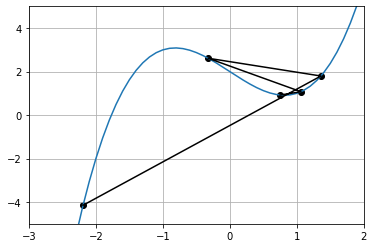

In [6]:
X = np.arange(-20, 20, 0.1)
x0 = 0.75

points, minimum = gradient_descent_1d(df2, x0, 1, max_iters=4)

fig = plt.figure()
plot_gradient_descent_1d(f2, X, points, minimum, fig)
fig.gca().set_ylim([-5, 5])
fig.gca().set_xlim([-3, 2])

<hr />

Veiem que a partir de la quarta iteració ja arribem a $x < -1$ per $\alpha = 1$.

Com el valor de les derivades es molt gran, si prenem $\alpha$ gran, sortirem de les zones d'extrems locals i l'algorisme no convergirà cap a cap mínim local. El problema es que estem fent passes massa grans.

<hr />

#### Podem assegurar que sempre arribem a un minim?

Suposa ara la funció
$$
f_{2.2}(x) = \frac{x}{1+x^2}
$$
amb gradient
$$ \frac{\partial f_{2.2}}{\partial x} = \frac{1-x^2}{(1+x^2)^2}
$$

In [8]:
def f2_2(x):
    return x / (1 + x**2)

def df2_2(x):
    return (1 - x**2) / (1 + x**2)**2

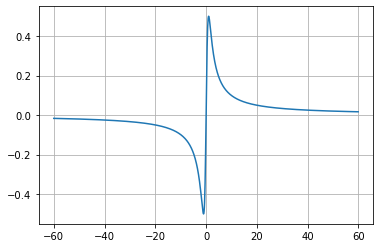

In [9]:
X = np.arange(-60, 60, 0.1)
fig = plt.figure()
plot_1d(X, f2_2(X), fig)

(-10.0, 10.0)

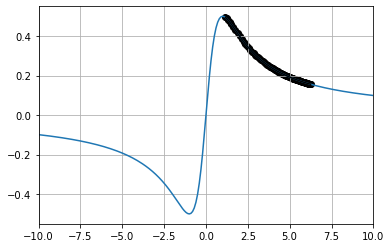

In [10]:
x0 = np.random.random() + 1
points, minimum = gradient_descent_1d(df2_2, x0, 1)

fig = plt.figure()
plot_gradient_descent_1d(f2_2, X, points, minimum, fig)
fig.gca().set_xlim([-10, 10])

(-10.0, 10.0)

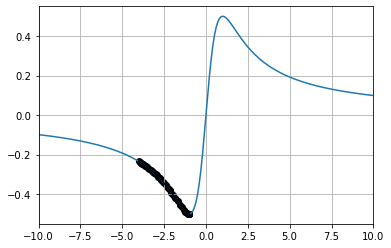

In [11]:
x0 = np.random.random() - 5
points, minimum = gradient_descent_1d(df2_2, x0, 1)

fig = plt.figure()
plot_gradient_descent_1d(f2_2, X, points, minimum, fig)
fig.gca().set_xlim([-10, 10])

(-10.0, 10.0)

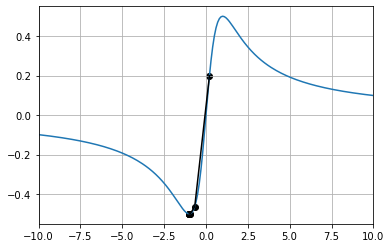

In [12]:
x0 = np.random.random()
points, minimum = gradient_descent_1d(df2_2, x0, 1)

fig = plt.figure()
plot_gradient_descent_1d(f2_2, X, points, minimum, fig)
fig.gca().set_xlim([-10, 10])

<hr />

Veiem que si comencem a l'esquerra del mínim, sempre convergeix cap a ell, ja que la derivada en aquesta tram es negativa i per tant ens movem cap a la dreta (en direcció al mínim).

Si comencem entre el minim i el màxim local, la derivada de la funció sempre serà positiva i per tant sempre ens mourem en direcció al mínim i convergirà.

En el cas en que comencem a la dreta del màxim, el valor de la derivada és sempre negatiu, per tant ens mourem cap a la dreta. Com el signe de la derivada no canviarà, el sentit del nostre moviment tampoc ho farà i ens allunyarem poc a poc del minim local.

<hr />

### Cas N-dimensionals

Podem aplicar el procediment anterior quan tenim funcions dos-dimensionals? La resposta és que sí. 

L'unic canvi en el procediment és que ara caldrà avançar en dues direccions.

Sigui la funció 2-dimensional $f_3$:
$$ f_3(x_1, x_2) = x_1^2 + x_2^2$$

i el seu gradient:

$$\nabla {f_3(x_1, x_2)} = 
\left( \frac{\partial f_3}{\partial x_1}, \frac{\partial f_3}{\partial x_2}\right) = 
\left( 2 x_1, 2 x_2 \right)$$

Visualitza la forma de grafica i el comportament del seu gradient.

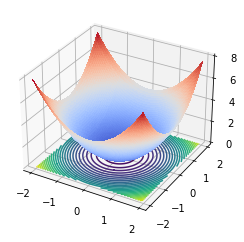

In [13]:
def f3 ( x, y=None ):
    if y is None:
        # x is an array with 2 rows
        x, y = x
        
    return x**2 + y**2

def grad_f3(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return np.asarray((2 * x, 2 * y))

# Surface to plot
fig = plt.figure()
X, Y, Z = generate_grid(f3)
plot_2d(X, Y, Z, fig)

Per veure millor el gradient en aquest cas, podem imprimir el seu comportament en un pla.

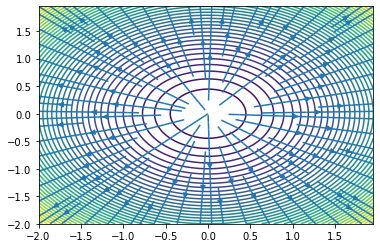

In [14]:
fig = plt.figure()
project_gradient(f3, grad_f3, fig)

Implamenteu l'algorisme anterior amb el cas 2-dimensional.

Recordeu amb amb la llibreria numpy podeu sumar o restar vectors, multiplicar per un escalar, etc.

In [15]:
# Algorithm that implement the gradient descent
#IMPORTANT NUMPY

def gradient_descent_2d(gradient, x, alpha=0.1, eps=1e-6, max_iter=1000, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * Una np.array [2] amb el punts dels recoregut
    """
    
    x_next = x - gradient(x) * alpha
    array = np.array([x, x_next])
    
    i = 1
    while(np.linalg.norm(x_next - x) > eps and i < max_iter):
        
        x = x_next
        x_next = x - gradient(x)*alpha
        
        array = np.append(array, [x_next], axis=0)
        
        i += 1
    
    if verbose:
        print (i)
    
    return (array, x_next)

x0 = np.asarray([1, 1])
points, minimum = gradient_descent_2d(grad_f3, x0)

58


Minimum:  [0. 0.]


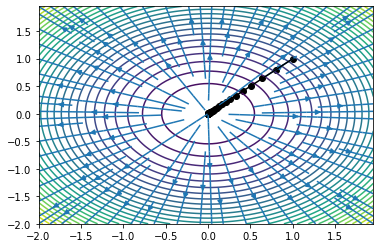

In [16]:
print ("Minimum: ", np.round(minimum,3))

fig = plt.figure()
X, Y, _ = generate_grid(f3)
plot_gradient_descent_2d(f3, grad_f3, X, Y, points, minimum, fig)

Considera ara la funció
$$f_4(x_1, x_2) = 100(x_1^2 + x_2^2)$$

amb gradient

$$\nabla {f_4(x_1, x_2)} = 
\left( \frac{\partial f_4}{\partial x_1}, \frac{\partial f_4}{\partial x_2}\right) = 
\left( 200 x_1, 200 x_2 \right)$$

En aquest cas, igual que en molts altres, és més útil utilizar el gradient normalizat per aplicar l'algorisme. 

** Fent servir `gradient_descent_2d`, podeu trobar el mínim de les funcions $f_3$ i $f_4$ amb el següents paràmetres:**

* $\alpha$ igual en les dues crides, es pot modificar
* $x=(1, 1)$ en les dues crides
* `max_iter=100` en les dues crides
* `eps=1e-6` en les dues crides

**Justifica perque són capaços, o no, de trobar el mínim amb aquest paràmetres. Quines dificultats presenta?**

In [17]:
def f4(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return 100 * (x**2 + y**2)

def grad_f4(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return np.asarray((200 * x, 200 * y))

In [51]:
x0 = np.asarray((1, 1))
alpha = 0.009
points_f3, minimum_f3 = gradient_descent_2d(grad_f3, x0, alpha=0.01, max_iter=100, eps=1e-6, verbose=True)
points_f4, minimum_f4 = gradient_descent_2d(grad_f4, x0, alpha=0.01, max_iter=100, eps=1e-6, verbose=True)

points_f3_conv, minimum_f3_conv = gradient_descent_2d(grad_f3, x0, alpha=0.002, max_iter=100, eps=1e-6, verbose=True)
points_f4_conv, minimum_f4_conv = gradient_descent_2d(grad_f4, x0, alpha=0.002, max_iter=100, eps=1e-6, verbose=True)

100
100
100
27


[0.13261956 0.13261956]


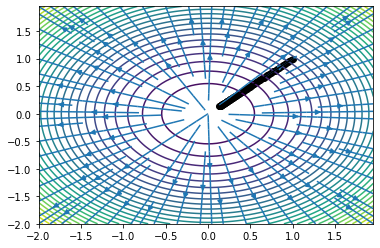

In [52]:
fig = plt.figure()
X, Y, _ = generate_grid(f3)
plot_gradient_descent_2d(f3, grad_f3, X, Y, points_f3, minimum_f3, fig)
print(minimum_f3)

[0.66978257 0.66978257]


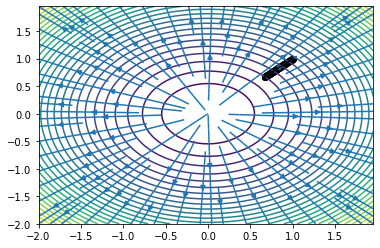

In [53]:
fig = plt.figure()
X, Y, _ = generate_grid(f3)
plot_gradient_descent_2d(f3, grad_f3, X, Y, points_f3_conv, minimum_f3_conv, fig)
print(minimum_f3_conv)

[1. 1.]


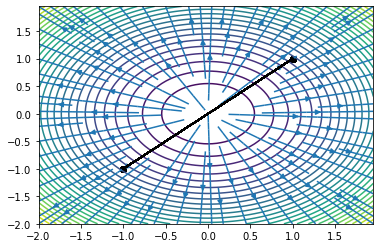

In [54]:
fig = plt.figure()
X, Y, _ = generate_grid(f4)
plot_gradient_descent_2d(f4, grad_f4, X, Y, points_f4, minimum_f4, fig)
print(minimum_f4)

[1.02349037e-06 1.02349037e-06]


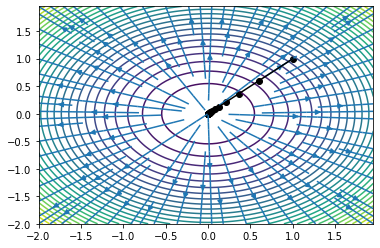

In [55]:
fig = plt.figure()
X, Y, _ = generate_grid(f4)
plot_gradient_descent_2d(f4, grad_f4, X, Y, points_f4_conv, minimum_f4_conv, fig)
print(minimum_f4_conv)

<hr />

Com les funcions són iguals pero multiplicades per una constant, el gradient de la segona és molt més gran, per tant divergeix amb valors de $\alpha > 0.01$.

Veiem que per $\alpha = 0.01$ en el cas de la segona funció entren en un cicle i tots els passos van saltant entre dos punts de manera que no convergeix, mentre que la primera si que convergeix.


Quan posem $\alpha < 0.01$ veiem que la segona funció convergeix. Cal tenir en compte que si posem un valor de $\alpha$ molt petit, és possible que no arribem al mínim ja farem les passes molt petites (com és el cas de la primera funció per $\alpha = 0.002$).


Si prenem el gradient normalitzat, podem evitar aquest problema i tenir convergencia per la mateixa $\alpha$ per a dues funcions que es diferencien per producte d'una constant.


<hr />

## Temps de convergència

Observa ara la següent funció, anomenada funció de **Rosenbrock**.

$$ f(x_1, x_2) = (a - x_1)^2 + b (x_2 - x_1^2)^2$$

**El mínim d'aquesta funció es troba al punt: $(x_1, x_2) = (a, a^{2})$.**

In [56]:
A_ROS = 1

def f_ros(x, y=None, a=A_ROS, b=10):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return (a-x)**2 + b*(y-x**2)**2

def grad_f_ros(x, y=None, a=A_ROS, b=10):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return np.asarray((-2*a + 4*b*x**3 - 4*b*x*y + 2*x, 2*b*(y-x**2)))

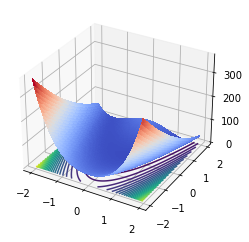

In [57]:
# Surface to plot
fig = plt.figure()
X, Y, Z = generate_grid(f_ros)
plot_2d(X, Y, Z, fig)

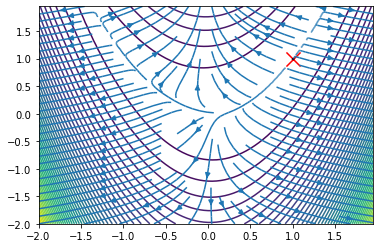

In [58]:
fig = plt.figure()
project_gradient(f_ros, grad_f_ros, fig)
plt.scatter(A_ROS, A_ROS**2, marker='x', color='r', s=200)

Aquesta funció té un mínim molt pla, la pendent és pràcticament nula al sel voltat, pel que els mètodes iteratius triguen molt a trobar el mínim

2109
[0.99988876 0.99977307]


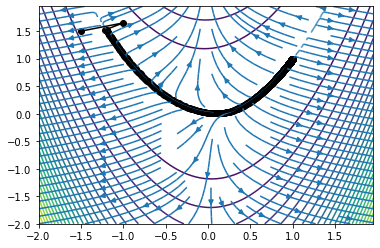

In [59]:
fig = plt.figure()
x0 = np.asarray((-1.5, 1.5))
points, minimum = gradient_descent_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000)
X, Y, _ = generate_grid(f_ros)
plot_gradient_descent_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
print(minimum)

## Trobant el pas òptim

Una possibilitat per fer menys iteracions i accelerar la convergència és trobant el valor de $\alpha$ automàticament a cada pas, és a dir aquella $\alpha$ que fa mínim el valor de $f$.

L'algorisme és tal que:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient
3. $\alpha = 10$
4. Calcular $x^{k+1} = x^{k}-\alpha \nabla f(x^{k})$
5. Si $f(x^{k+1}) > f(x^{k})$, $\alpha = \alpha / 2$, descartar $x^{k+1}$ i tornar al pas 4
6. En cas contrari, moure's a $x^{k+1}$ i repetir des de 2

In [60]:
def gradient_descent_2d_auto(f, gradient, x, eps=1e-6, max_iter=1000, initial_alpha=10, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param f: Funció a minimitzar
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param initial_alpha: Pas inicial a cada iteració, corresponent al punt 3 anterior
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * Una np.array [2] amb el punts dels recoregut
    """    
    
    alpha = initial_alpha
    x_temp = x
    x_next = x + (eps+1)*np.ones(x.size)
    
    array = np.array([x])
    
    i = 0
    
    while(np.linalg.norm(x_next - x) > eps and i < max_iter):

        x = x_temp
        x_next = x - gradient(x)*alpha
        
        
        if(f(x_next) > f(x)):
            alpha = alpha/2
            x_next = x + (eps+1)*np.ones(x.size) # Allways enter the while
            continue
        
        array = np.append(array, [x_next], axis=0)
        alpha = initial_alpha
        
        i += 1
        x_temp = x_next
    
    if verbose:
        print (i)
    
    return (array, x_next)
    

1002
[0.99996455 0.99992681]


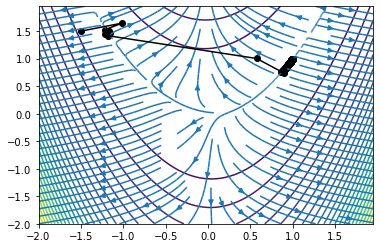

In [61]:
fig = plt.figure()
x0 = np.asarray((-1.5, 1.5))
points, minimum = gradient_descent_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000)
X, Y, _ = generate_grid(f_ros)
plot_gradient_descent_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
print(minimum)

In [62]:
%timeit gradient_descent_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000, verbose=False)

37.7 ms ± 8.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%timeit gradient_descent_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000, verbose=False)

187 ms ± 5.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Noteu que el segon mètode pot trigar més (és més costós), però pot convergir en menys iteracions. 